In [ ]:
import os
import math
import string
#import data set to list
import glob
import pandas as pd
import numpy as np


#"/content/drive/My Drive/"
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
fileName = r'/content/drive/My Drive/617_Project/data.csv'
filePCA = r'/content/drive/My Drive/617_Project/cancerPC.csv'

breast_cancer_data = pd.read_csv(fileName) #opens the file in read mode
 #puts the file into an array
        #words['a'] = words['a'].str.join(" ") 
        #print(words)


breast_cancer_data.head()

pcaData = pd.read_csv(filePCA)



Create Training Test Data

In [ ]:
from sklearn.model_selection import train_test_split


X = m.iloc[:, 0:29].values
y = m.iloc[:, 30].values
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(X_train.shape)
print(X_test.shape)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

#y_train_df

(512, 29)
(57, 29)


Run

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline

In [ ]:
lda = LinearDiscriminantAnalysis()
#x = pd.DataFrame([breast_cancer_data['radius_mean'], breast_cancer_data['texture_mean']],index = [1] )

m = breast_cancer_data.drop(['Unnamed: 32'], axis=1)

print(m.groupby('diagnosis').count())
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["B", "M"])
#le.classes_
le.transform(["B", "M"])

le.transform(m['diagnosis'])

m['diagnosis_B_0_M_1'] = le.transform(m['diagnosis'])

m = m.drop(['diagnosis', 'id'], axis = 1)

print(m)


#print(m)
model = lda.fit(m, m['diagnosis_B_0_M_1'])
#model.size
#print(model.priors_)
#print(model.means_)
pred=model.predict(m)
#print(pred)
y_ = m['diagnosis_B_0_M_1']
#print(y_)

print(y_)

            id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
diagnosis                    ...                                         
B          357          357  ...             357                      357
M          212          212  ...             212                      212

[2 rows x 31 columns]
     radius_mean  texture_mean  ...  fractal_dimension_worst  diagnosis_B_0_M_1
0          17.99         10.38  ...                  0.11890                  1
1          20.57         17.77  ...                  0.08902                  1
2          19.69         21.25  ...                  0.08758                  1
3          11.42         20.38  ...                  0.17300                  1
4          20.29         14.34  ...                  0.07678                  1
..           ...           ...  ...                      ...                ...
564        21.56         22.39  ...                  0.07115                  1
565        20.13         28.25  ...      

In [ ]:
print(confusion_matrix(pred, y_))
print(classification_report(y_, pred, digits=3))

[[355  18]
 [  2 194]]
              precision    recall  f1-score   support

           0      0.952     0.994     0.973       357
           1      0.990     0.915     0.951       212

    accuracy                          0.965       569
   macro avg      0.971     0.955     0.962       569
weighted avg      0.966     0.965     0.965       569



LDA Code with PCA data

In [ ]:
mPCA = pcaData.drop(['id','diag','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'], axis=1)
X=mPCA
y = y_

In [ ]:
from sklearn.model_selection import KFold # import KFold
#kf = KFold(n_splits=10) # Define the split – into 2 folds
#kf.get_n_splits(mPCA) # returns the number of splitting iterations in the cross-validator
#print(kf) 
#KFold(n_splits=10, random_state=None, shuffle=False)
#from sklearn import cross_validation

k_fold = KFold(10, True, 1)
print('LDA Results: ')
for train, test in k_fold.split(X):
	print('train: %s, test: %s' % (train, test))
	#print(len(train))

LDA Results: 
train: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19
  20  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38
  39  40  42  43  44  45  46  48  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  86  87  88  89  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 108 109 110 112 113 114 115 116 117 118 119
 120 121 122 123 125 126 127 128 129 130 131 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 181 182 183 184 185 188 189 190 191 192 193 194 196 198 199 200
 201 202 203 204 205 206 208 209 210 211 212 213 215 216 217 218 219 220
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 238 239 240
 241 243 244 246 247 248 249 250 251 252 253 254 255 256 258 259 260 261
 262 263 264 265 266 267 268 2

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.947 (0.024)


In [ ]:
accuracy = cross_val_score(lda, X, y, scoring='accuracy', cv = cv)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy * 100)
print("Misclassification Error Rate is:", (1-accuracy) * 100)
missclass_rate = (1-accuracy) * 100
misclass_rate_total = []
for i in range(9):
  misclass_rate_total.append(missclass_rate[i]*512)
misclass_rate_total.append(missclass_rate[9]*513)
#print(misclass_rate_total)


rate_total = sum(misclass_rate_total)/(10*512)

misclass_rate_mean = mean(missclass_rate)
print(misclass_rate_mean)

print(rate_total)
#print(missclass_rate)

print("Total Misclassification Error: ", rate_total)

[0.94736842 0.94736842 0.92982456 0.94736842 0.89473684 0.98245614
 0.94736842 0.98245614 0.94736842 0.94642857]
Accuracy of Model with Cross Validation is: [94.73684211 94.73684211 92.98245614 94.73684211 89.47368421 98.24561404
 94.73684211 98.24561404 94.73684211 94.64285714]
Misclassification Error Rate is: [ 5.26315789  5.26315789  7.01754386  5.26315789 10.52631579  1.75438596
  5.26315789  1.75438596  5.26315789  5.35714286]
5.2725563909774475
5.273602707941734
Total Misclassification Error:  5.273602707941734


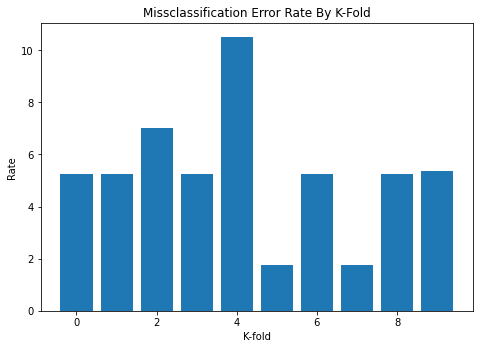

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = range(10)
ax.bar(langs,missclass_rate)

ax.set_ylabel('Rate')
ax.set_xlabel('K-fold')
ax.set_title('Missclassification Error Rate By K-Fold')

plt.show()
plt.close()

In [ ]:
pcaDf = pd.DataFrame(data = pcaData)

pca_Df1 = pd.DataFrame(pcaDf[['PC1','PC2','diag']])

mPCA = pcaData.drop(['id','diag','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'], axis=1)

modelPCA = lda.fit(mPCA, y_)

print(modelPCA.priors_)
print(modelPCA.means_)
predPCA=modelPCA.predict(mPCA)

[0.62741652 0.37258348]
[[ 2.20403463e+00 -3.45982861e-01  2.12974211e-01  1.38225736e-01
  -9.81573253e-02  9.66519421e-03  4.94046886e-02  3.39595276e-02
  -4.39936076e-05  3.06347921e-03  6.21112356e-03  3.40860084e-03
   3.71810657e-02  2.47246759e-02  2.50801706e-02 -4.33651112e-04
   7.18973139e-03]
 [-3.71151114e+00  5.82622081e-01 -3.58640534e-01 -2.32766923e-01
   1.65293232e-01 -1.62758223e-02 -8.31956312e-02 -5.71865630e-02
   7.40835750e-05 -5.15878339e-03 -1.04592977e-02 -5.73995519e-03
  -6.26115117e-02 -4.16354212e-02 -4.22340609e-02  7.30252109e-04
  -1.21072364e-02]]


In [ ]:
print(confusion_matrix(predPCA, y_))
print(classification_report(y_, predPCA, digits=3))
cm_lda_pca = confusion_matrix(predPCA, y_)

[[355  23]
 [  2 189]]
              precision    recall  f1-score   support

           0      0.939     0.994     0.966       357
           1      0.990     0.892     0.938       212

    accuracy                          0.956       569
   macro avg      0.964     0.943     0.952       569
weighted avg      0.958     0.956     0.956       569



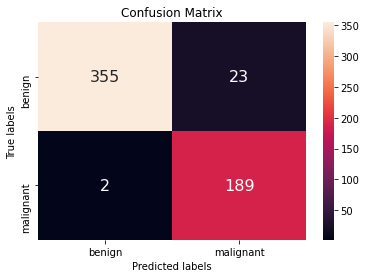

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sn
cm_lda_pca = confusion_matrix(predPCA, y_)
cm_lda_pca.astype(int)

df_cm = pd.DataFrame(cm_lda_pca, range(2), range(2))

ax = plt.subplot()
plt.figure()
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', ax = ax)


ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['benign', 'malignant']); ax.yaxis.set_ticklabels(['benign', 'malignant']);

#print(df_cm)

[[7.44284844e-05 9.99925572e-01]
 [1.47390352e-03 9.98526096e-01]
 [2.55457664e-05 9.99974454e-01]
 ...
 [2.59564496e-01 7.40435504e-01]
 [8.30292515e-08 9.99999917e-01]
 [9.99916516e-01 8.34835953e-05]]
AUC: 0.99


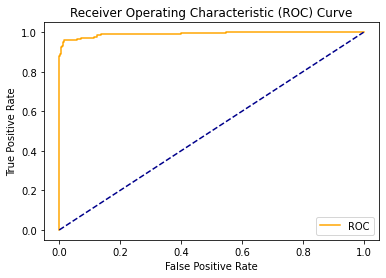

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


probs = modelPCA.predict_proba(mPCA)
print(probs)
probs = probs[:, 1]
auc = roc_auc_score(y_, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_, probs)
plot_roc_curve(fpr, tpr)
#print(y)

AUC of ROC Curve: 0.9918741081338195


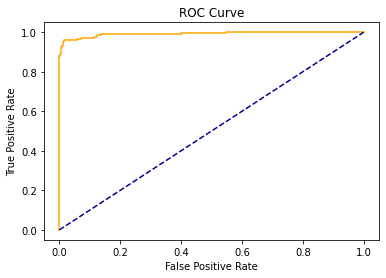

In [ ]:
scores = modelPCA.predict_proba(mPCA)[:,1]
fpr, tpr, thresholds = roc_curve(y_, scores)

roc_auc = roc_auc_score(y_, scores)
print("AUC of ROC Curve:", roc_auc)

plt.plot(fpr, tpr,color='orange', label='ROC')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

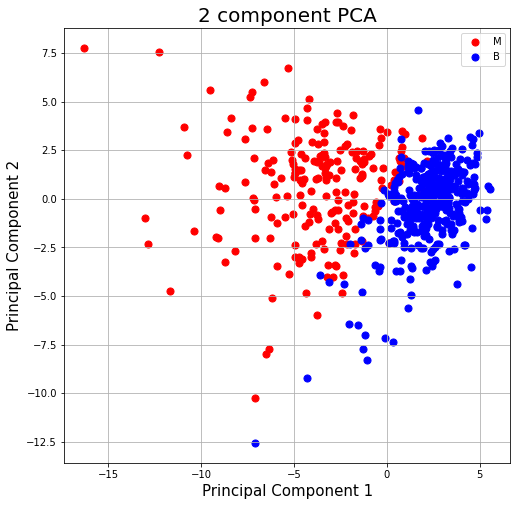

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'b']
for target, color in zip(targets,colors):
  indicesToKeep = pca_Df1['diag'] == target
  ax.scatter(pca_Df1.loc[indicesToKeep, 'PC1'], pca_Df1.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

Start QDA

In [ ]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X, y)
#print(model2.priors_)
#print(model2.means_)
model_QDA_PCA = qda.fit(mPCA,y_)
pred_QDA_PCA = model_QDA_PCA.predict(mPCA)

In [ ]:
print(np.unique(pred_QDA_PCA, return_counts=True))
print(confusion_matrix(pred_QDA_PCA, y_))
print(classification_report(y_, pred_QDA_PCA, digits=3))

cm_qda_pca = confusion_matrix(pred_QDA_PCA, y_)

(array([0, 1]), array([360, 209]))
[[349  11]
 [  8 201]]
              precision    recall  f1-score   support

           0      0.969     0.978     0.974       357
           1      0.962     0.948     0.955       212

    accuracy                          0.967       569
   macro avg      0.966     0.963     0.964       569
weighted avg      0.967     0.967     0.967       569



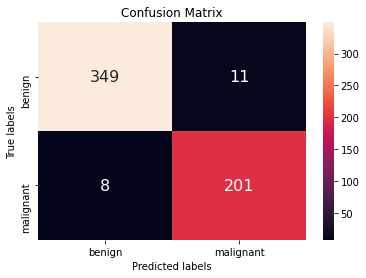

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sn
cm_qda_pca.astype(int)


df_cm_qda = pd.DataFrame(cm_qda_pca, range(2), range(2))

ax= plt.subplot()
plt.figure()
sn.heatmap(df_cm_qda, annot=True, annot_kws={"size": 16}, fmt='g', ax = ax)
ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['benign', 'malignant']); ax.yaxis.set_ticklabels(['benign', 'malignant']);
#print(df_cm_qda)

AUC: 1.00


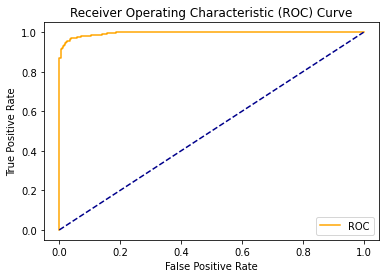

In [ ]:
probs2 = model_QDA_PCA.predict_proba(mPCA)
probspositive_qda = probs2[:, 1]
auc2 = roc_auc_score(y_, probspositive_qda)
print('AUC: %.2f' % auc2)
fpr2, tpr2, thresholds2 = roc_curve(y_, probspositive_qda)
plot_roc_curve(fpr2, tpr2)

AUC of ROC Curve: 0.995111252047989


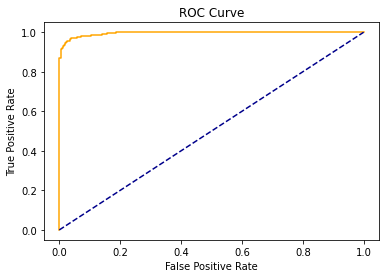

In [ ]:
scores_QDA = model_QDA_PCA.predict_proba(mPCA)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_, scores_QDA)

roc_auc2 = roc_auc_score(y_, scores_QDA)
print("AUC of ROC Curve:", roc_auc2)

plt.plot(fpr2, tpr2,color='orange', label='ROC')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

In [ ]:
#cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
scores2 = cross_val_score(qda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

Accuracy: 0.956 (0.018)


In [ ]:
accuracy2 = cross_val_score(qda, mPCA, y_, scoring='accuracy', cv = cv)
print(accuracy2)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy2 * 100)
print("Misclassification Error Rate is:", (1-accuracy2) * 100)
missclass_rate2 = (1-accuracy2) * 100

misclass_rate_mean2 = mean(missclass_rate2)
misclass_rate_mean2

[0.96491228 0.96491228 0.92982456 0.94736842 0.94736842 0.98245614
 0.94736842 0.98245614 0.96491228 0.92857143]
Accuracy of Model with Cross Validation is: [96.49122807 96.49122807 92.98245614 94.73684211 94.73684211 98.24561404
 94.73684211 98.24561404 96.49122807 92.85714286]
Misclassification Error Rate is: [3.50877193 3.50877193 7.01754386 5.26315789 5.26315789 1.75438596
 5.26315789 1.75438596 3.50877193 7.14285714]


4.398496240601506

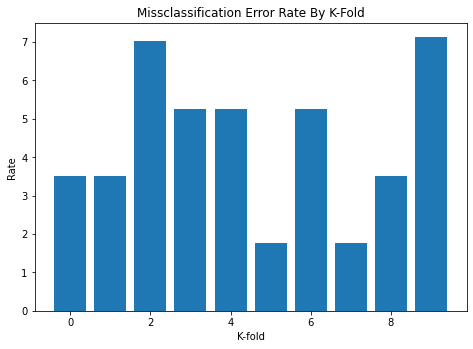

In [ ]:

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.bar(range(10),missclass_rate2)
ax2.set_ylabel('Rate')
ax2.set_xlabel('K-fold')
ax2.set_title('Missclassification Error Rate By K-Fold')
plt.show()
plt.close()

In [ ]:
print(X)
print(mPCA)
print(y, y_)

           PC1        PC2       PC3  ...      PC15      PC16      PC17
0    -9.184755  -1.946870 -1.122179  ...  0.601264  0.744461 -0.265237
1    -2.385703   3.764859 -0.528827  ... -0.008967 -0.648238 -0.017197
2    -5.728855   1.074229 -0.551263  ... -0.482995  0.324825  0.190751
3    -7.116691 -10.266556 -3.229948  ...  0.168699  0.051325  0.482210
4    -3.931842   1.946359  1.388545  ... -0.310047 -0.152472  0.133025
..         ...        ...       ...  ...       ...       ...       ...
564  -6.433655   3.573673  2.457324  ... -0.652177  0.147512  0.347960
565  -3.790048   3.580897  2.086640  ...  0.069913 -0.138063  0.293237
566  -1.255075   1.900624  0.562236  ... -0.090918 -0.232444 -0.065557
567 -10.365673  -1.670540 -1.875379  ... -0.229389 -0.060993 -0.168366
568   5.470430   0.670047  1.489133  ... -0.217152  0.920478 -0.304542

[569 rows x 17 columns]
           PC1        PC2       PC3  ...      PC15      PC16      PC17
0    -9.184755  -1.946870 -1.122179  ...  0.601264  